## Метрики в задаче регрессии

## Стандартные метрики регрессии

- Общая концепция - $\frac1n \sum\limits_{i=1}^n L(a(x_i), y_i)$

-  MAE - Mean Absolute Error - $\frac1n \sum\limits_{i=1}^n |a(x_i) - y_i|$

- MSE - Mean Squared Error - $\frac1n \sum\limits_{i=1}^n (a(x_i) - y_i)^2$

- MAPE - Mean Absolute Percentage Error - $\frac1n \sum\limits_{i=1}^n \frac{|a(x_i) - y_i|}{y_i}$

- sMAPE - symmetric Mean Absolute Percentage Error - $\frac2n \sum\limits_{i=1}^n \frac{|a(x_i) - y_i|}{a(x_i) + y_i}$

### Несколько свойств оптимизации метрик регрессии

- $\sum\limits_{i=1}^n \left(a(x_i) - y_i\right)^2 \to \min \implies a(x_i) \approx E(y \mid x = x_i)$

- $\sum\limits_{i=1}^n \left|~a(x_i) - y_i~\right| \to \min \implies a(x_i) \approx median(y \mid x = x_i)$


Давайте теперь реализуем эти метрики с помощью Numpy

In [ ]:
import numpy as np

In [ ]:
y_true = np.array([4, 5, 8])

y_pred_fst = np.array([4.5, 5.3, 7.4])

y_pred_snd = np.array([4.1, 4.9, 9.5])

In [ ]:
np.power(3, 2)

9

In [ ]:
def MSE(y_true, y_pred):
    # your code here
    return np.power(y_pred - y_true, 2).mean()

In [ ]:
def MAE(y_true, y_pred):
  # your code here
    return np.abs(y_pred - y_true).mean()

In [ ]:
def MAPE(y_true, y_pred):
  # your code here
    return (np.abs(y_pred - y_true) / y_true).mean()

In [ ]:
print(y_true, y_pred_fst, y_pred_snd, sep='\n')

[4 5 8]
[4.5 5.3 7.4]
[ 4.1  4.9 11.5]


In [ ]:
MSE(y_true, y_pred_fst)

0.23333333333333317

In [ ]:
MSE(y_true, y_pred_snd)

0.7566666666666667

In [ ]:
MAE(y_true, y_pred_fst)

0.4666666666666665

In [ ]:
MAE(y_true, y_pred_snd)

0.5666666666666664

In [ ]:
MAPE(y_true, y_pred_fst)

0.08666666666666663

In [ ]:
MAPE(y_true, y_pred_snd)

0.16083333333333327

## Устойчивость метрик к выбросам

Сгенерируем датасет из 500 точек на плоскости, для которых $y = 0.5x +1+ \epsilon$ ",где $\epsilon$ распределено нормально с матожиданием 0 и дисперсией 0.2.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
mu, sigma = 0, 0.2 # mean and standard deviation
n = 500

In [ ]:
x = np.linspace(0, 10, n)

In [ ]:
def f_0(x):
    return 0.5 * x + 1

In [ ]:
# f(x) = 0.5x+1+epsilon,   epsilon in N(mu, sigma)
def f(x):
    random = np.random.normal(mu, sigma, n)
    return 0.5 * x + 1 + random

1) Визуализируем выборку

No handles with labels found to put in legend.


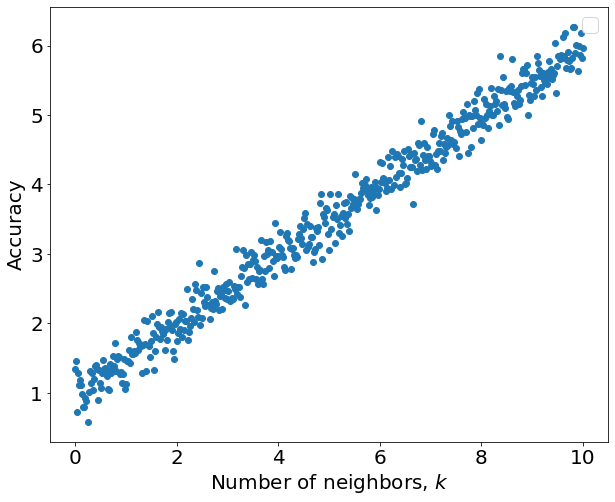

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x, f(x))
plt.xlabel(r"Number of neighbors, $k$", fontsize=20)
plt.ylabel(r"Accuracy", fontsize=20)
plt.yscale('linear')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

2) Восстановите по выборке зависимость $y(x)$, считая, что зависимость имеет вид $y = kx+b$, и минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize. Визуализируйте восстановленную прямую.

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
np.array(list(zip(x, np.ones(n))))

In [ ]:
# create matrix A for MSE optimization
# we suggest that suitable function is y=kx+b 
A = np.array(list(zip(x, np.ones(n))))
y = f(x)

def MSE_of_linear_func(x):
    return mean_squared_error(A.dot(x), y)

In [ ]:
from scipy.optimize import minimize
x0 = [0, 0]
res1 = minimize(MSE_of_linear_func, x0, method='Nelder-Mead', tol=1e-6)
print("MSE optimization gives k_1 = {} and b_1 = {}".format(res1.x[0], res1.x[1]))

MSE optimization gives k_1 = 0.4982274322915395 and b_1 = 1.00630591140929


Как работает метод оптимизации `Nelder-Mean` - процесс оптимизации похож на то, как амеба скатывается в самую глубокую часть ямы

![](https://www.jakubkonka.com/images/nelder-mead/one-minimum.gif)

Часто функции оптимизируют с помощью метода градиентного спуска

![](https://hackernoon.com/hn-images/0*D7zG46WrdKx54pbU.gif)

![](https://blog.paperspace.com/content/images/2018/05/68747470733a2f2f707669676965722e6769746875622e696f2f6d656469612f696d672f70617274312f6772616469656e745f64657363656e742e676966.gif)

In [ ]:
x[2]

0.04008016032064128

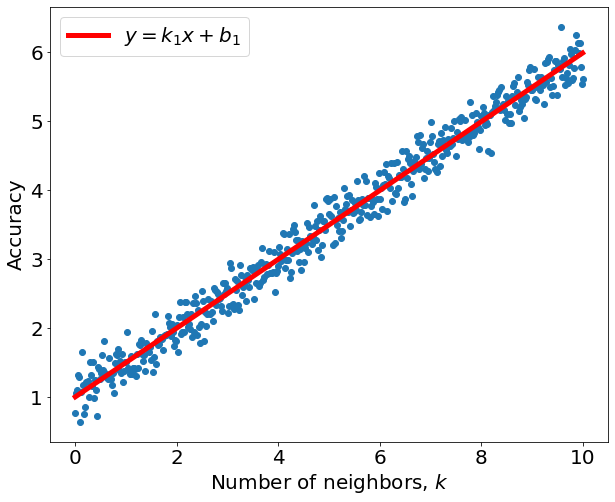

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, res1.x[0]*x+res1.x[1], c = 'r', linewidth=5, label=r"$ y = k_{1}x+b_{1}$")

plt.xlabel(r"Number of neighbors, $k$", fontsize=20)
plt.ylabel(r"Accuracy", fontsize=20)
plt.yscale('linear')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

Добавим в выборку 75 точек, для которых $y = -1+\epsilon$, а $x$ принимает различные значения из того же диапазона, что и у уже имевшихся точек в обучающей выборке. По новой расширенной выборке снова попробуйте восстановить зависимость $y(x)=kx+b$ двумя способами: минимизируя MSE и минимизируя MAE. 

Визуализируйте полученные прямые.

In [ ]:
# add some noise to argument
x_new = np.concatenate((x, np.linspace(0, 10, 75)), axis = 0)
print(x_new.shape)

(575,)


In [ ]:
# add some noise to argument
y1 = -1 + np.random.normal(mu, sigma, 75)
y_new = np.concatenate((y,y1), axis = 0)

In [ ]:
from sklearn.metrics import mean_absolute_error
A_new = np.array(list(zip(x_new, np.ones(575))))

def MSE_of_linear_func(x):
    return mean_squared_error(A_new.dot(x), y_new)

def MAE_of_linear_func(x):
    return mean_absolute_error(A_new.dot(x), y_new)

In [ ]:
from scipy.optimize import minimize
x0 = [0, 0]
res2 = minimize(MSE_of_linear_func, x0, method='Nelder-Mead', tol=1e-6)
print("MSE optimization gives k_2 = {} and b_2 = {}".format(res2.x[0], res2.x[1]))

MSE optimization gives k_2 = 0.4328373428620314 and b_2 = 0.7491061082903325


In [ ]:
from scipy.optimize import minimize
x0 = [0, 0]
res3 = minimize(MAE_of_linear_func, x0, method='Nelder-Mead', tol=1e-6)
print("MAE optimization gives k_3 = {} and b_3 = {}".format(res3.x[0], res3.x[1]))

MAE optimization gives k_3 = 0.4960545875501745 and b_3 = 0.9771586139325119


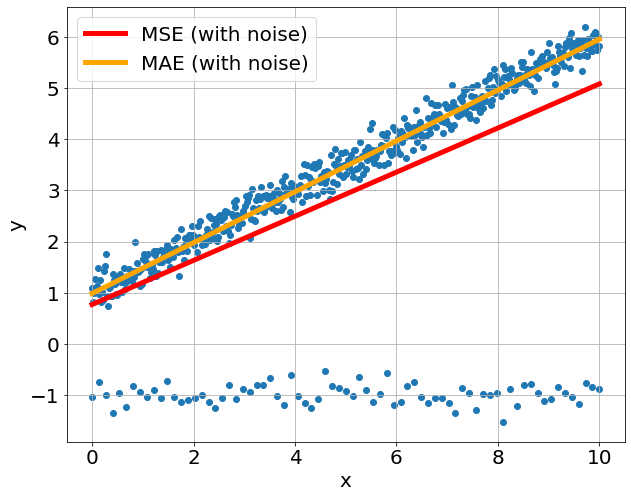

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x_new, y_new)
#plt.semilogy(x_new, res1.x[0]*x_new+res1.x[1], c = 'black', label=r"MSE")
plt.semilogy(x_new, res2.x[0]*x_new+res2.x[1], c = 'r', linewidth=5, label=r"MSE (with noise)")
plt.semilogy(x_new, res3.x[0]*x_new+res3.x[1], c = 'orange', linewidth=5, label=r"MAE (with noise)")
plt.xlabel(r"x", fontsize=20)
plt.ylabel(r"y", fontsize=20)
plt.grid()
plt.yscale('linear')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

Почему оптимизация MAE более устойчива к выбросам в данных, чем оптимизация MSE?